In [1]:
from matplotlib import pyplot as plt
import os
import numpy as np
from PIL import Image
import cv2

In [2]:
path, dirs, files = next(os.walk("./face_data/"))
file_count = len(files)
images = []
for i in range(file_count):
    digit = 0
    data = np.zeros((256,256,3))
    x =i
    while(x is not 0):
        digit+=1
        x = x//10
    if digit == 0:
        data = np.asarray(cv2.imread('./face_data/face000.bmp',0)).astype('float32')
    elif digit==1:
        data = np.asarray(cv2.imread('./face_data/face00'+str(i)+'.bmp',0)).astype('float32')
    elif digit==2:
        data = np.asarray(cv2.imread('./face_data/face0'+str(i)+'.bmp',0)).astype('float32')
    elif digit == 3:
        data = np.asarray(cv2.imread('./face_data/face'+str(i)+'.bmp',0)).astype('float32')
    images.append(data)

In [3]:
image_array = np.zeros((177,65536))
temp1d =np.array
for i in range(len(images)):
    temp = np.zeros((256,256)) 
    temp = np.copy(images[i])
    temp1d = np.zeros((65536))
    temp1d = temp.flatten()
    image_array[i]+=temp1d

## Divide the dataset into Train & Test

In [4]:
train = np.zeros((157,65536))
test = np.zeros((20,65536))
train = np.copy(image_array[:157])
test = np.copy(image_array[157:])

## Lets Calculate the Mean of training DataSet

In [5]:
train[np.isnan(train)] = 0
mean_temp_image = np.zeros((256,256))
mean_temp_image = np.reshape(np.mean(train, axis=0), (256,256))

In [6]:
height, width = train.shape
mean_temp_image1 = np.zeros((65536))
for i in range(width):
    sum_image = 0
    for j in range(height):
        sum_image+= train[j][i]
    mean_temp_image1[i] = sum_image//157


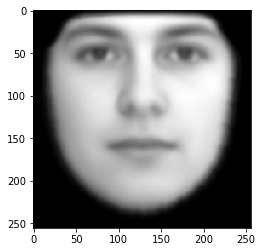

In [7]:
plt.imshow(np.reshape(mean_temp_image1, (256,256)), cmap='gray')
plt.show()

## Lets Normalize the training DataSet

In [8]:
normalizedTrainingDataset = np.zeros((train.shape))
for i in range(len(train)):
    normalizedTrainingDataset[i] = train[i]- mean_temp_image1

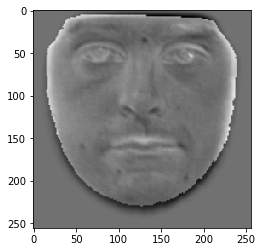

In [9]:
plt.imshow(np.reshape(normalizedTrainingDataset[2], (256,256)), cmap='gray')
plt.show()

### Display Normalized Image

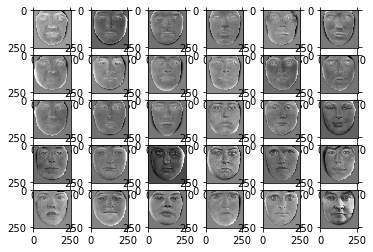

In [10]:
for i in range(30):
    temp_display = normalizedTrainingDataset[i].reshape(256,256)
    plt.subplot(5,6,1+i)
    plt.imshow(temp_display,cmap="gray")
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off')
plt.show()
del temp_display

## Get Principal Component from Normalized Training Dataset

In [12]:
normalized_Transpose = normalizedTrainingDataset.transpose()

In [13]:
Normalized_dot_Normalized_Transpose = np.dot(normalizedTrainingDataset, normalized_Transpose)

In [14]:
temp_values, temp_vectors = np.linalg.eig(Normalized_dot_Normalized_Transpose)

## IF we need to take transpose of training or normalized dataset of training

In [15]:
eigen_vectors = np.dot(normalized_Transpose, temp_vectors)
# eigen_vectors = np.dot(train.transpose(), temp_vectors)
eigen_vectors = eigen_vectors.transpose()



In [16]:
eigen_pair = zip(temp_values, eigen_vectors)
eigen_Sortedpairs = sorted(eigen_pair, key = lambda x: x[0], reverse=True)

In [17]:
sorted_eigenValues = []
sorted_eigenVectors = []
for i, j in eigen_Sortedpairs:
    sorted_eigenValues.append(i)
    sorted_eigenVectors.append(j)

In [18]:
sorted_eigenValues = np.array(sorted_eigenValues)
sorted_eigenVectors = np.array(sorted_eigenVectors)

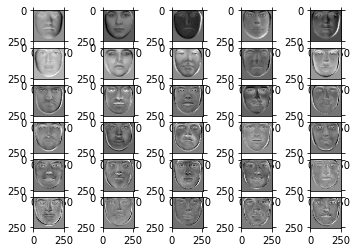

In [19]:
for i in range(30):
    temp_display = sorted_eigenVectors [i].reshape(256,256)
    plt.subplot(6,5,1+i)
    plt.imshow(temp_display,cmap="gray")
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off')
plt.show()
del temp_display

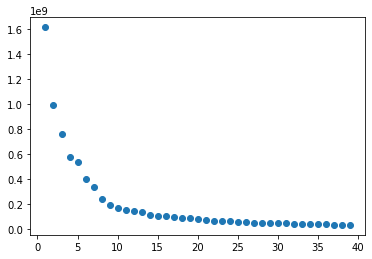

In [20]:
num_comp = range(1,40)
plt.scatter(num_comp,sorted_eigenValues[:39])
plt.show()

## Finding Weight for training Data for k =30

In [21]:
eigenK30 = np.array(sorted_eigenVectors[:30])
weight30 = []
for i in normalizedTrainingDataset:
    weight30.append(np.dot(eigenK30,i))

In [22]:
weight30 = np.array(weight30)

#### Lets take an image which is from test dataset

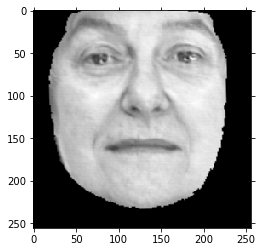

In [23]:
testing_image = test[0]
plt.imshow(np.reshape(testing_image,(256,256)),cmap="gray")
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off')
plt.show()

#### Lets normalize this image by subtracting mean of train

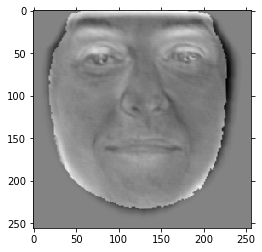

In [24]:
normalized_testing_image = testing_image - mean_temp_image1
plt.imshow(np.reshape(normalized_testing_image,(256,256)),cmap="gray")
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off')
plt.show()

#### Lets calculate the weight of above image

In [26]:
weight_normalized_image = np.dot(eigenK30,normalized_testing_image)